<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_1_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.588065,38.949982,53.129071,0.034191,181.701308,181.647358,0.053951
1,0.0,1.0,91.179161,58.633329,54.040855,-0.125994,213.727350,213.824572,-0.097222
2,0.0,2.0,60.512387,55.825976,44.905044,-0.075108,171.168299,171.231954,-0.063655
3,0.0,3.0,31.199595,37.098985,31.525468,0.100513,109.924561,109.829631,0.094930
4,0.0,4.0,46.691182,66.529652,82.000203,0.030153,205.251190,205.226103,0.025087
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.176563,89.065060,68.166067,-0.154349,235.253341,235.407610,-0.154268
59996,999.0,56.0,31.673184,95.517076,28.812557,-0.023899,165.978918,165.980664,-0.001746
59997,999.0,57.0,39.545140,54.884185,26.216332,-0.017762,130.627896,130.645161,-0.017265
59998,999.0,58.0,78.440623,64.397278,30.180106,0.035609,183.053617,183.003005,0.050612


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.588065,38.949982,53.129071,0.034191,181.701308,181.647358,0.053951
1,0.0,1.0,91.179161,58.633329,54.040855,-0.125994,213.727350,213.824572,-0.097222
2,0.0,2.0,60.512387,55.825976,44.905044,-0.075108,171.168299,171.231954,-0.063655
3,0.0,3.0,31.199595,37.098985,31.525468,0.100513,109.924561,109.829631,0.094930
4,0.0,4.0,46.691182,66.529652,82.000203,0.030153,205.251190,205.226103,0.025087
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.176563,89.065060,68.166067,-0.154349,235.253341,235.407610,-0.154268
59996,999.0,56.0,31.673184,95.517076,28.812557,-0.023899,165.978918,165.980664,-0.001746
59997,999.0,57.0,39.545140,54.884185,26.216332,-0.017762,130.627896,130.645161,-0.017265
59998,999.0,58.0,78.440623,64.397278,30.180106,0.035609,183.053617,183.003005,0.050612


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    79.588065  38.949982  53.129071  ...  181.701308  181.647358  0.053951
      1.0    91.179161  58.633329  54.040855  ...  213.727350  213.824572 -0.097222
      2.0    60.512387  55.825976  44.905044  ...  171.168299  171.231954 -0.063655
      3.0    31.199595  37.098985  31.525468  ...  109.924561  109.829631  0.094930
      4.0    46.691182  66.529652  82.000203  ...  205.251190  205.226103  0.025087
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   68.176563  89.065060  68.166067  ...  235.253341  235.407610 -0.154268
      56.0   31.673184  95.517076  28.812557  ...  165.978918  165.980664 -0.001746
      57.0   39.545140  54.884185  26.216332  ...  130.627896  130.645161 -0.017265
      58.0   78.440623  64.397278  30.180106  ...  183.053617  183.003005  0.050612
      59.0   60.003187  99.859336  48.698863  ...  218.491039  218.542671 -0.051632

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    79.588065  38.949982  53.129071  ...  181.701308  181.647358  0.053951
      1.0    91.179161  58.633329  54.040855  ...  213.727350  213.824572 -0.097222
      2.0    60.512387  55.825976  44.905044  ...  171.168299  171.231954 -0.063655
      3.0    31.199595  37.098985  31.525468  ...  109.924561  109.829631  0.094930
      4.0    46.691182  66.529652  82.000203  ...  205.251190  205.226103  0.025087
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   68.176563  89.065060  68.166067  ...  235.253341  235.407610 -0.154268
      56.0   31.673184  95.517076  28.812557  ...  165.978918  165.980664 -0.001746
      57.0   39.545140  54.884185  26.216332  ...  130.627896  130.645161 -0.017265
      58.0   78.440623  64.397278  30.180106  ...  183.053617  183.003005  0.050612
      59.0   60.003187  99.859336  48.698863  ...  218.491039  218.542671 -0.051632

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.588065,38.949982,53.129071,0.034191,181.701308,181.647358,0.053951
1,0.0,1.0,91.179161,58.633329,54.040855,-0.125994,213.727350,213.824572,-0.097222
2,0.0,2.0,60.512387,55.825976,44.905044,-0.075108,171.168299,171.231954,-0.063655
3,0.0,3.0,31.199595,37.098985,31.525468,0.100513,109.924561,109.829631,0.094930
4,0.0,4.0,46.691182,66.529652,82.000203,0.030153,205.251190,205.226103,0.025087
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.176563,89.065060,68.166067,-0.154349,235.253341,235.407610,-0.154268
59996,999.0,56.0,31.673184,95.517076,28.812557,-0.023899,165.978918,165.980664,-0.001746
59997,999.0,57.0,39.545140,54.884185,26.216332,-0.017762,130.627896,130.645161,-0.017265
59998,999.0,58.0,78.440623,64.397278,30.180106,0.035609,183.053617,183.003005,0.050612


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    79.588065  38.949982  53.129071  ...  181.701308  181.647358  0.053951
      1.0    91.179161  58.633329  54.040855  ...  213.727350  213.824572 -0.097222
      2.0    60.512387  55.825976  44.905044  ...  171.168299  171.231954 -0.063655
      3.0    31.199595  37.098985  31.525468  ...  109.924561  109.829631  0.094930
      4.0    46.691182  66.529652  82.000203  ...  205.251190  205.226103  0.025087
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   68.176563  89.065060  68.166067  ...  235.253341  235.407610 -0.154268
      56.0   31.673184  95.517076  28.812557  ...  165.978918  165.980664 -0.001746
      57.0   39.545140  54.884185  26.216332  ...  130.627896  130.645161 -0.017265
      58.0   78.440623  64.397278  30.180106  ...  183.053617  183.003005  0.050612
      59.0   60.003187  99.859336  48.698863  ...  218.491039  218.542671 -0.051632

[60000 rows x 7 columns]

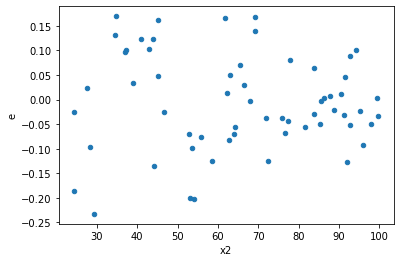

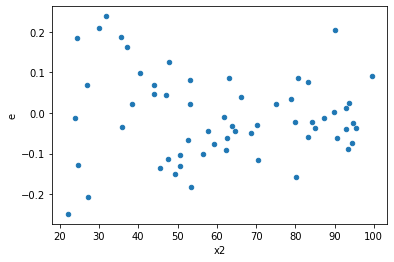

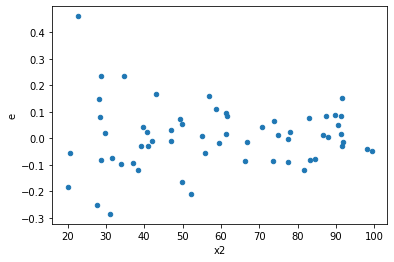

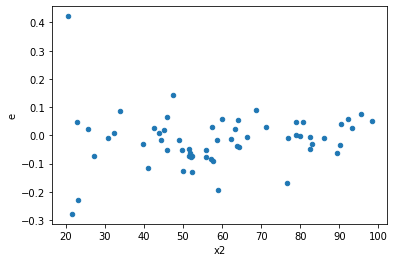

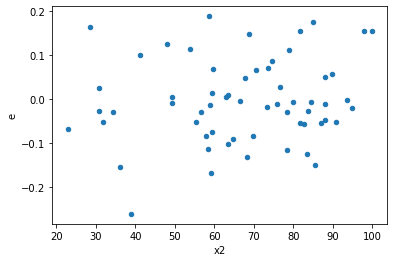

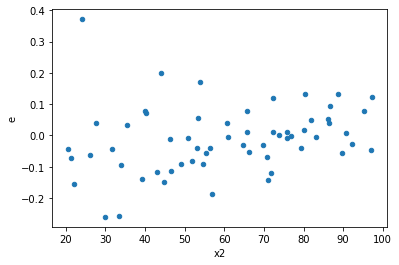

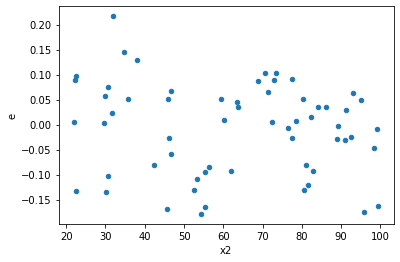

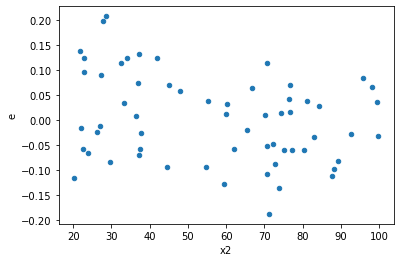

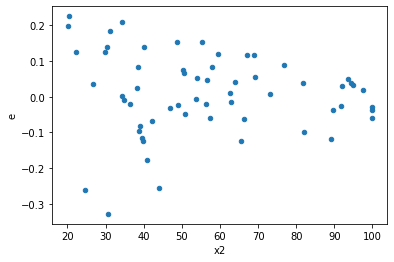

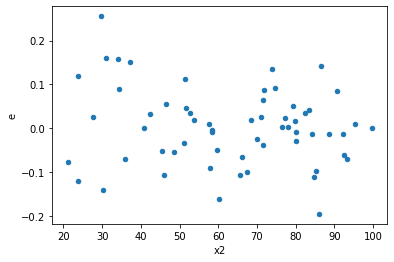

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
159.0,21.0,21.0,0.11310896216368299,0.1675326178156754,0.0053861410554134756,0.007977743705508352,1.4811613033212565,0.3752779101899515,0.8123610449050243,0.18763895509497575,Reject001=1 : Homoscedasticity
196.0,21.0,21.0,0.15587491861596922,0.17406434411912128,0.007422615172189011,0.008288778291386727,1.1166924458704324,0.8027127841405735,0.5986436079297133,0.4013563920702867,Reject001=1 : Homoscedasticity
383.0,21.0,21.0,0.11215430727709952,0.18148301962016408,0.005340681298909501,0.008642048553341147,1.6181547015557252,0.27810234152646895,0.8609488292367655,0.13905117076323448,Reject001=1 : Homoscedasticity
396.0,21.0,21.0,0.11021620311069413,0.13038022569669236,0.005248390624318768,0.006208582176032969,1.1829497117202157,0.7038065346887297,0.6480967326556352,0.35190326734436483,Reject001=1 : Homoscedasticity
507.0,21.0,21.0,0.14049145034256127,0.14425427863715495,0.006690069063931489,0.006869251363674046,1.026783325856618,0.9522802073548213,0.5238598963225893,0.47614010367741066,Reject001=1 : Homoscedasticity
528.0,21.0,21.0,0.1174723105327089,0.19974509864998966,0.005593919549176614,0.009511671364285221,1.7003589845487272,0.23206538954104783,0.8839673052294761,0.11603269477052391,Reject001=1 : Homoscedasticity
788.0,21.0,21.0,0.11911489442827165,0.1845584434820774,0.005672137829917698,0.008788497308670352,1.5494153301979745,0.3233660179677591,0.8383169910161204,0.16168300898387955,Reject001=1 : Homoscedasticity
791.0,21.0,21.0,0.05996585374084739,0.10397165927269457,0.0028555168448022566,0.004951031393937837,1.7338477281091627,0.2155531004576241,0.892223449771188,0.10777655022881205,Reject001=1 : Homoscedasticity
817.0,21.0,21.0,0.15509336684657854,0.20758260757477454,0.007385398421265644,0.009884886074989264,1.3384363999275315,0.5099823519004758,0.7450088240497621,0.2549911759502379,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.3727476644531607,0.07070282004526557,0.017749888783483842,0.0033668009545364556,0.1896801154984837,0.0003463492350183579,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,0.427772492898821,0.12008789141444388,0.020370118709467668,0.005718471019735423,0.2807284091612868,0.005293433999404737,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,0.5674096760364548,0.0975646956472176,0.027019508382688323,0.004645937887962743,0.17194753591221681,0.00016420342606998856,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,0.3767888707580197,0.06698884971690472,0.01794232717895332,0.0031899452246145106,0.17778882264260432,0.00021224398034628024,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,0.22672281673715566,0.1522901627589366,0.010796324606531222,0.007251912512330314,0.6717019704968188,0.36913250397404557,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,0.41885043572135044,0.08819026912778397,0.019945258843873832,0.00419953662513257,0.2105531273374501,0.0007461648038509128,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,0.2232217808411375,0.10648280187383953,0.010629608611482738,0.0050706096130399775,0.47702693470410584,0.09740381040246693,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,0.2128366822626087,0.10630135418207957,0.010135080107743272,0.005061969246765694,0.4994503440479286,0.11953721263546709,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,0.3854021524315483,0.10151037514471437,0.018352483449121347,0.004833827387843541,0.26338818946462356,0.0035012122509052467,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      593
Reject001=0 : Heteroscedasticity    407
Name: Result_test, dtype: int64